## Squared Error Cost function
### Very simple and basic demonstration about how cost function is used and computed for minimum cost

## What is a cost function?
### In very simple words a function that penalizes the algorithm (model) for predicting inaccurate outputs

### Lets learn a very simple version of cost function formula of which many of us would have faced as a method of validation or accuracy check
### Squared Error Cost function, i.e. (predicted-actual)^2.
#### for the below example, lets assume there is some single value for actual data = 4.

In [26]:
import pandas as pd
# lets define a function here as cost, which takes the input and return squared difference of input and our actual value 4
# argument to this cost function is the predicted value
def cost(x):
    return (x - 4) **2

In [27]:
# lets just check what output is generated from above cost function when predicted value is exactly 4
cost(4)

0

### So, we just saw that when the model predicts the value same as actual value, we get 0 cost

In [5]:
# lets again check what output is generated from above cost function when predicted value is 100
cost(100)

9216

### with 100 as predicted value, cost came to be 9216, thats pretty huge!

### Now, when the model doesnt know how to predict accurately, so that cost will be closer to 0, we need to find some way to help our model.
### Finding slope of the cost function is a very popular way to do that. 
### Mathematically, we know that, slope at any single point (peak or depth) is 0 (zero)
### Lets see the below graph and judge at which point, the slope will be 0

#### This below graph is a parabolic curve based on the nature of square error function and has its focus on value 4 (actual value of model)

Text(0.5, 0, 'Predicted values')

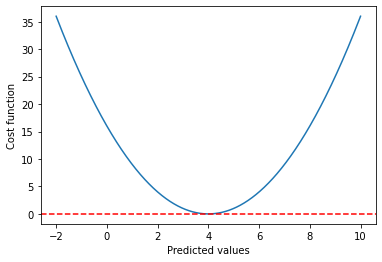

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# for better representation, created 1000 equally spaced points between -2 and 10
x = np.linspace(-2, 10, 1000)

# calculate the y value for each element of the x vector
y = (x-4)**2

fig, ax = plt.subplots()
ax.plot(x, y)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel ("Cost function")
plt.xlabel("Predicted values")

### After visualising the nature of our cost function above, looks like the slope of the graph will be 0 at the value 4 which in fact represent the overall minimum (zero) cost of model

### Hill/Gradient Descent are methods that helps model to achieve the minimum cost based on above idea to find slope closer to 0

### Well, our model/algorithm doesn't know, from where to start! It may start at any random value it predicts.

### Allow me to demostrate Hill descent mathematically

In [20]:
# with the differential calculus formula, derivative of above equation will give slope = 2 * (x-4)
def slope(x):
    return 2 * (x-4)

### initialising x with 20 ; 4 is our minima point; 0.1 is  the learning rate

In [23]:
x=20

In [24]:
s=[]
while True:
    x=x-0.1*slope(x)
    s.append(x)
    if (abs(x)-4)>0.0001:
        continue
    else:
        break
print("Iterations to reach the minima: ",len(s))

Iterations to reach the minima:  54


### with above values, Hill descent took 54 iterations to arrive the minima point

## Now, lets see the big brother of Hill Descent!

## Gradient Descent >>

### For this demontration, I will use a very popular advertisement dataset..(same one in ISLR )


In [32]:
data = pd.read_csv('Advertising.csv')[['TV','Radio','Sales']]
y = data['Sales']
X = np.column_stack((data['TV'], data['Radio']))

### standarising helps in Linear Regression problems...almost everytime!

In [34]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Now, lets define a function , which will : 
### creates mse - which will be our objective to minimize
### and vectorised form of Gradient equation (projecting of a vector onto another)

In [35]:
def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

### Now, lets define some parameters to function

In [36]:
w = np.array((-40, -40)) # initialized value for both of our variables
alpha = .1 # learning rate
tolerance = 0.001 # lowest value for convergence
 
old_w = []
errors = []

### Now lets run the gradient descent

In [37]:
# Perform Gradient Descent
iterations = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, y)
    new_w = w - alpha * gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break
 
    iterations += 1
    w = new_w
 


Iteration: 10 - Error: 732.6317
Iteration: 20 - Error: 256.7896
Iteration: 30 - Error: 205.5887
Iteration: 40 - Error: 200.0794
Iteration: 50 - Error: 199.4866
Iteration: 60 - Error: 199.4228
Iteration: 70 - Error: 199.4159
Iteration: 80 - Error: 199.4152
Gradient Descent has converged


In [38]:
print('w =', w)

w = [3.91359776 2.77964408]


In [47]:
import warnings
warnings.filterwarnings("ignore")

### Lets validate our weights with a linear regression model in python

In [48]:
import statsmodels.api as sm
X_1=data[['TV','Radio']].copy()
X_1 = sm.add_constant(X_1)
y_1=data.Sales
X1_scaled = scaler.fit_transform(X_1)

In [49]:
model = sm.OLS(y_1, X1_scaled).fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.109
Model:                            OLS   Adj. R-squared (uncentered):              0.100
Method:                 Least Squares   F-statistic:                              12.06
Date:                Mon, 01 Mar 2021   Prob (F-statistic):                    1.14e-05
Time:                        05:29:50   Log-Likelihood:                         -813.33
No. Observations:                 200   AIC:                                      1631.
Df Residuals:                     198   BIC:                                      1637.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1             3.9184      1.005      3.899      0.000       1.936       5.900
x2             2.7841      1.005      2.770      0.006       0.802       4.766
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Voila! self coded gradient descent algorithm performed almost very close to the one in statsmodel...

                            -------------- Thank You ------------------